In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
data = pd.read_csv("insurance.csv")

age = data["age"].to_numpy().reshape(1338,1)
bmi = data["bmi"].to_numpy().reshape(1338,1)
children = data["children"].to_numpy().reshape(1338,1)
charges = data["charges"].to_numpy().reshape(1338,1)

X = np.ndarray((1338,3), dtype=np.float64)
Y = np.ndarray((1338,1), dtype=np.float64)

X[:,0] = age[:,0]
X[:,1] = bmi[:,0]
X[:,2] = children[:,0]
X = normalize(X)
Y = charges

In [25]:
#GRADIENT DESCENT
def gradient_descent(X, Y, theta, learning_rate, num_iterations):
    prev_costs = []
    prev_thetas = []
    for i in range(num_iterations):
        prediction = np.dot(X, theta)
        error = prediction - Y
        cost = 1/(2*m) * np.dot(error.T, error)

        prev_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))

        prev_thetas.append(theta)
        
    
    return prev_thetas, [i[0].item() for i in prev_costs]

In [32]:
alpha = 0.01 #Step size
iterations = 500 #No. of iterations
m = Y.size #No. of data points
theta = np.random.rand(3).reshape(3,1) #Pick some random values to start with

prev_thetas, prev_costs = gradient_descent(X, Y, theta=theta, num_iterations=iterations, learning_rate=alpha)
theta = prev_thetas[-1]

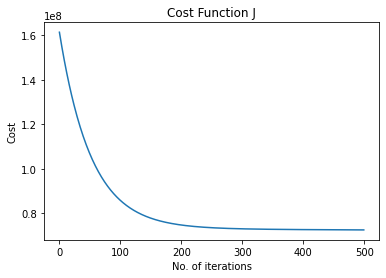

In [33]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(prev_costs)
plt.show()

In [137]:
X.shape

(1338, 3)